# Norwegian Petroleum Directorate

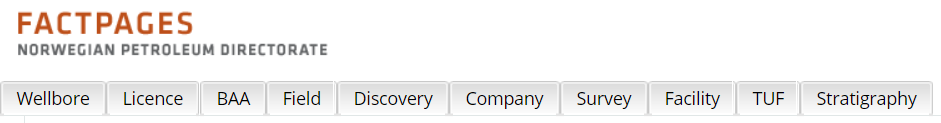

### This is an integrated visualisation of the data available at https://factpages.npd.no/en.  

The factpages data are separated into tabs (see above);

The visualisations below represent data from Wellbore, Licence, Field, Discovery, Company and Stratigraphy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
sns.set_style('darkgrid')

In [2]:
# Links and load function
from npd_load.load import load

### Load data under Wellbore tab

In [3]:
link_key = 'well_explCurrent'
df = load(link_key)

In [4]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbDrillingOperator').size()).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbContent').size()).sum(), 0))
    return a

In [5]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False)
data1 = df.groupby('wlbContent', dropna=False).size()

# WELLBORE
## Drilling Results: Current year
See Wellbore: Table view: Exploration: Current year

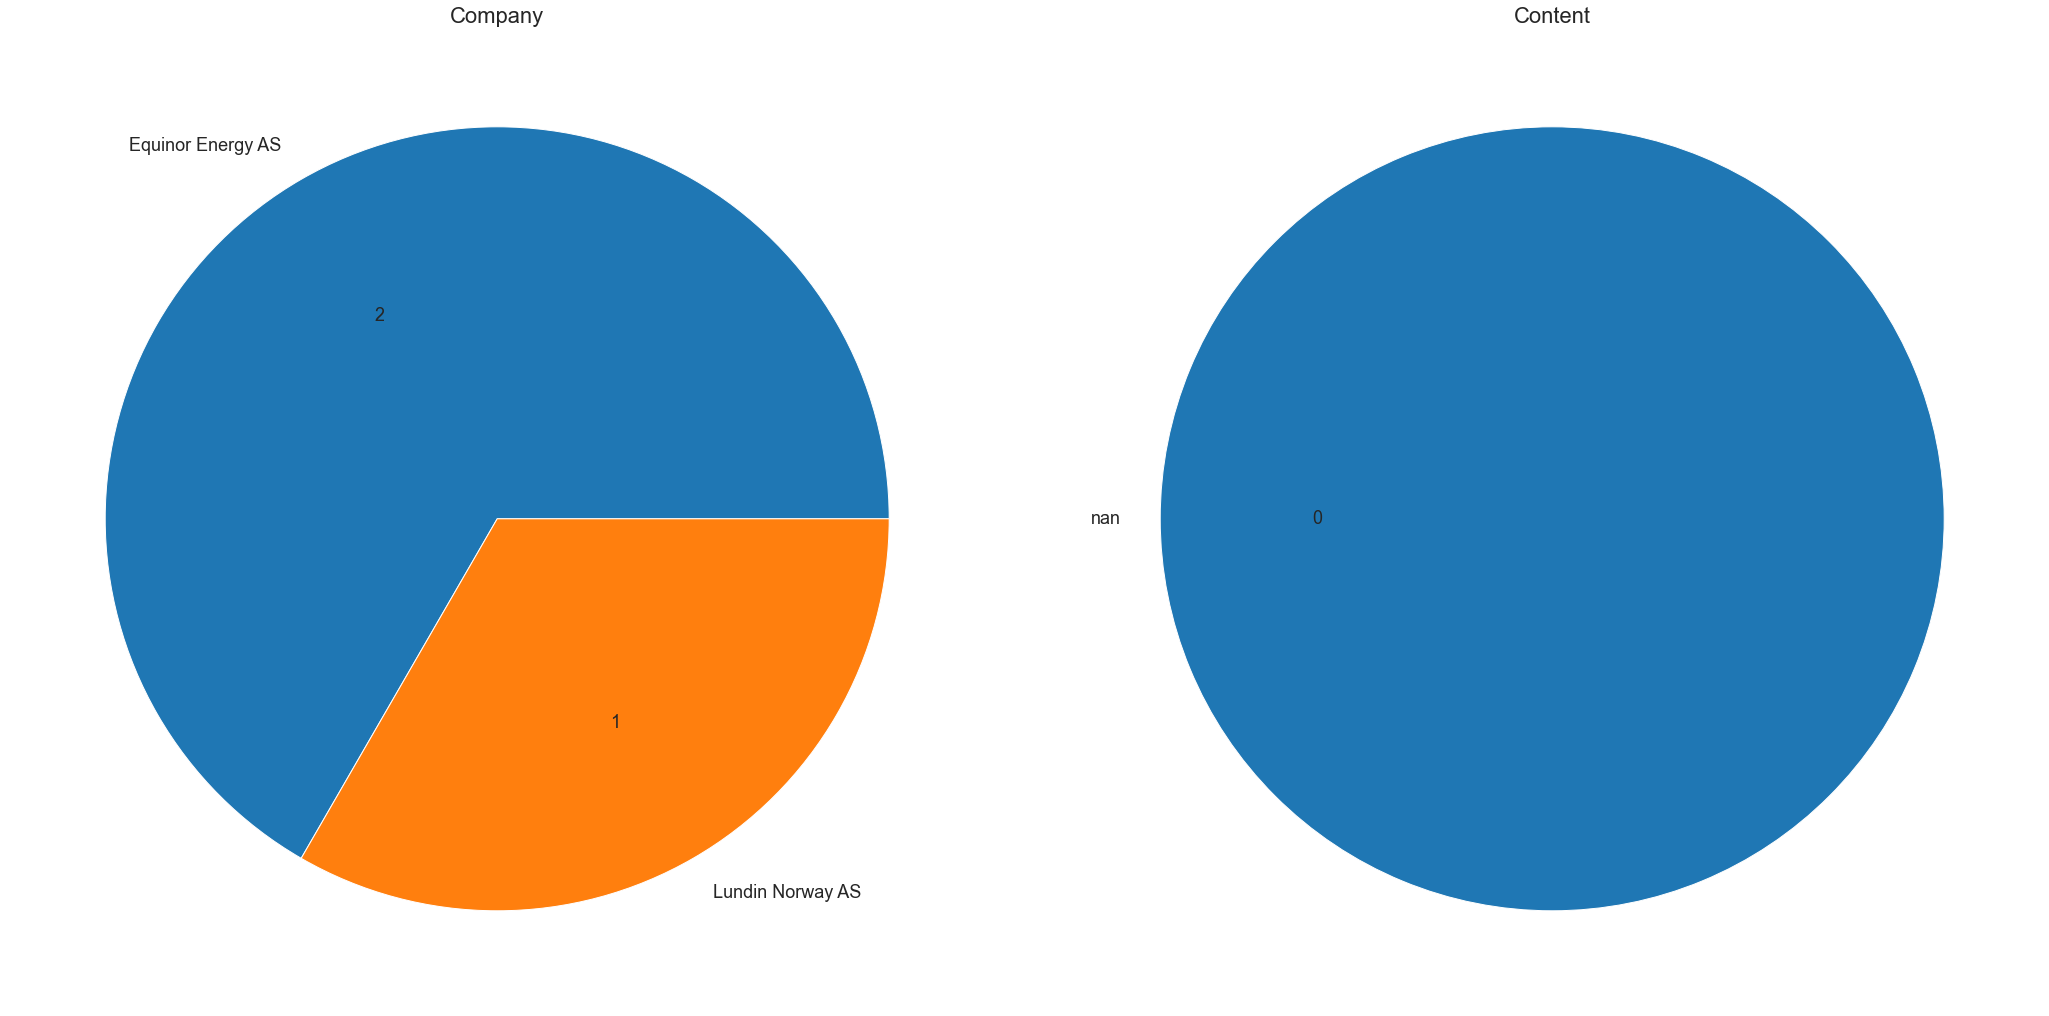

In [6]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18}); ax[0].set_title('Company', fontsize=22)
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18}); ax[1].set_title('Content', fontsize=22)
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_current.png")
plt.show()

In [7]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbContent').size()).sum(), 0))
    return a

### Load Previous year data

In [8]:
link_key = 'well_prevYear'
df = load(link_key)

In [9]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

## Drilling Results: Previous year
See Wellbore: Table view: Exploration: Last year

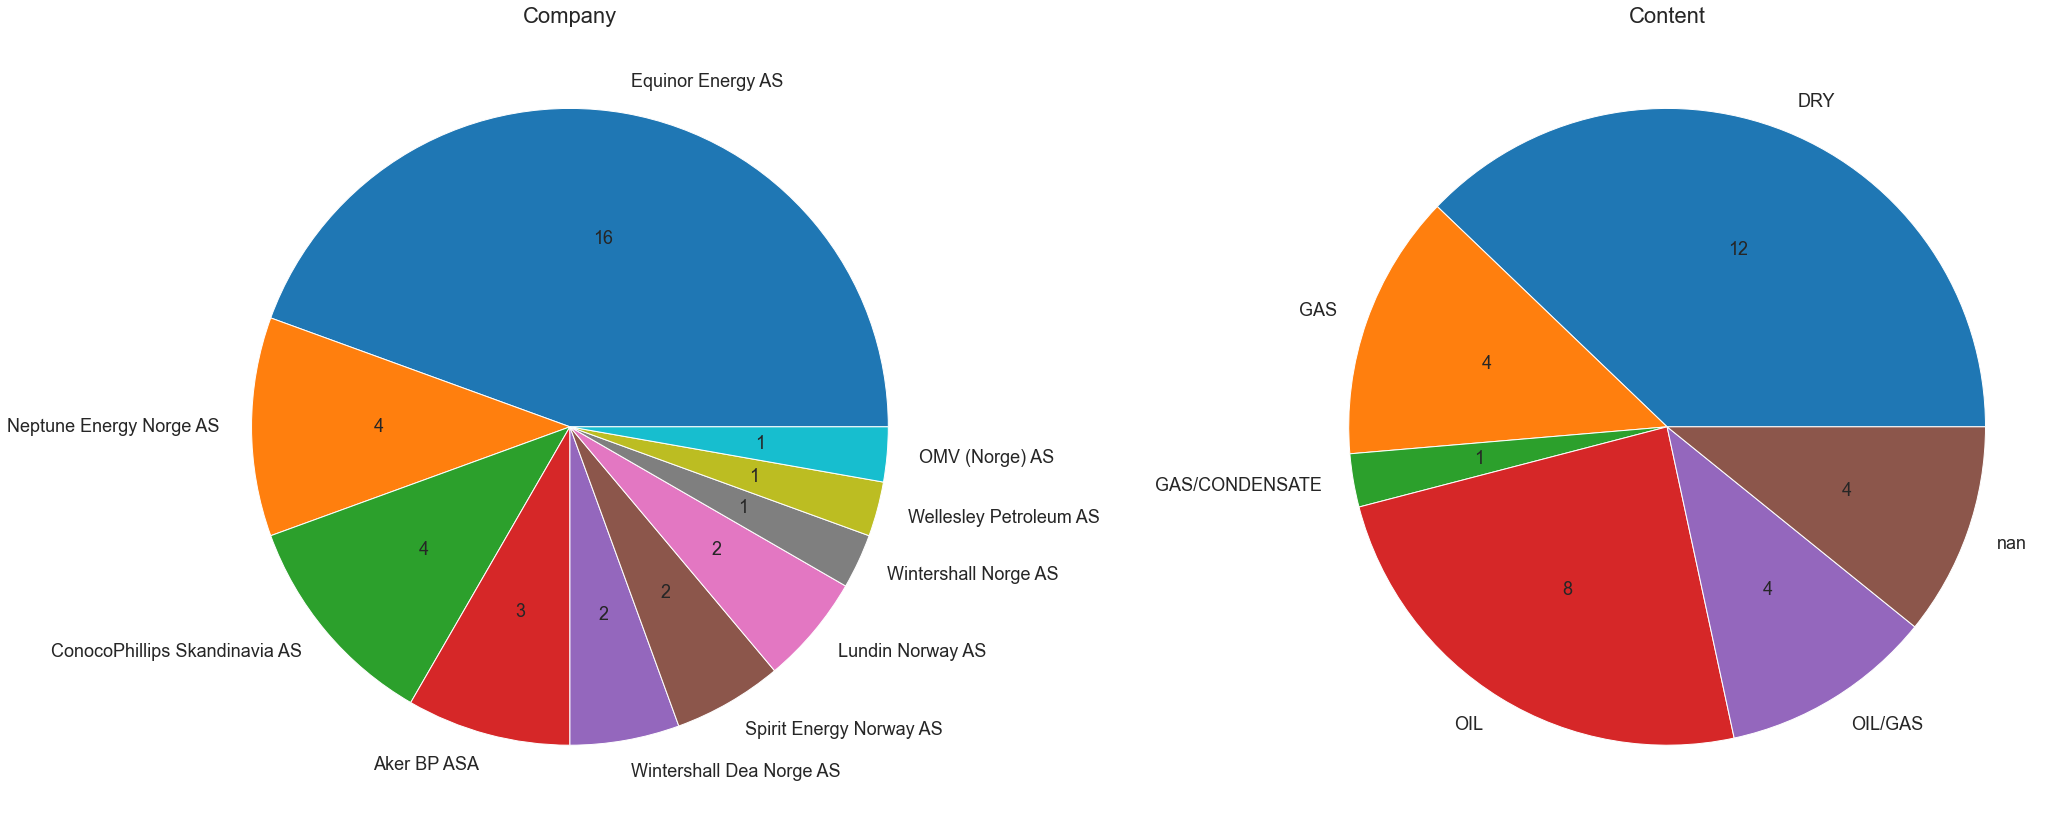

In [10]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18}); ax[0].set_title('Company', fontsize=22)
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18}); ax[1].set_title('Content', fontsize=22)
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_previous.png")
plt.show()

### Load Previous 10 years

In [11]:
link_key = 'well_expl10years'
df = load(link_key)

In [12]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

## Drilling Results: Previous 10 years
See Wellbore: Table View: Exploration: Last 10 years

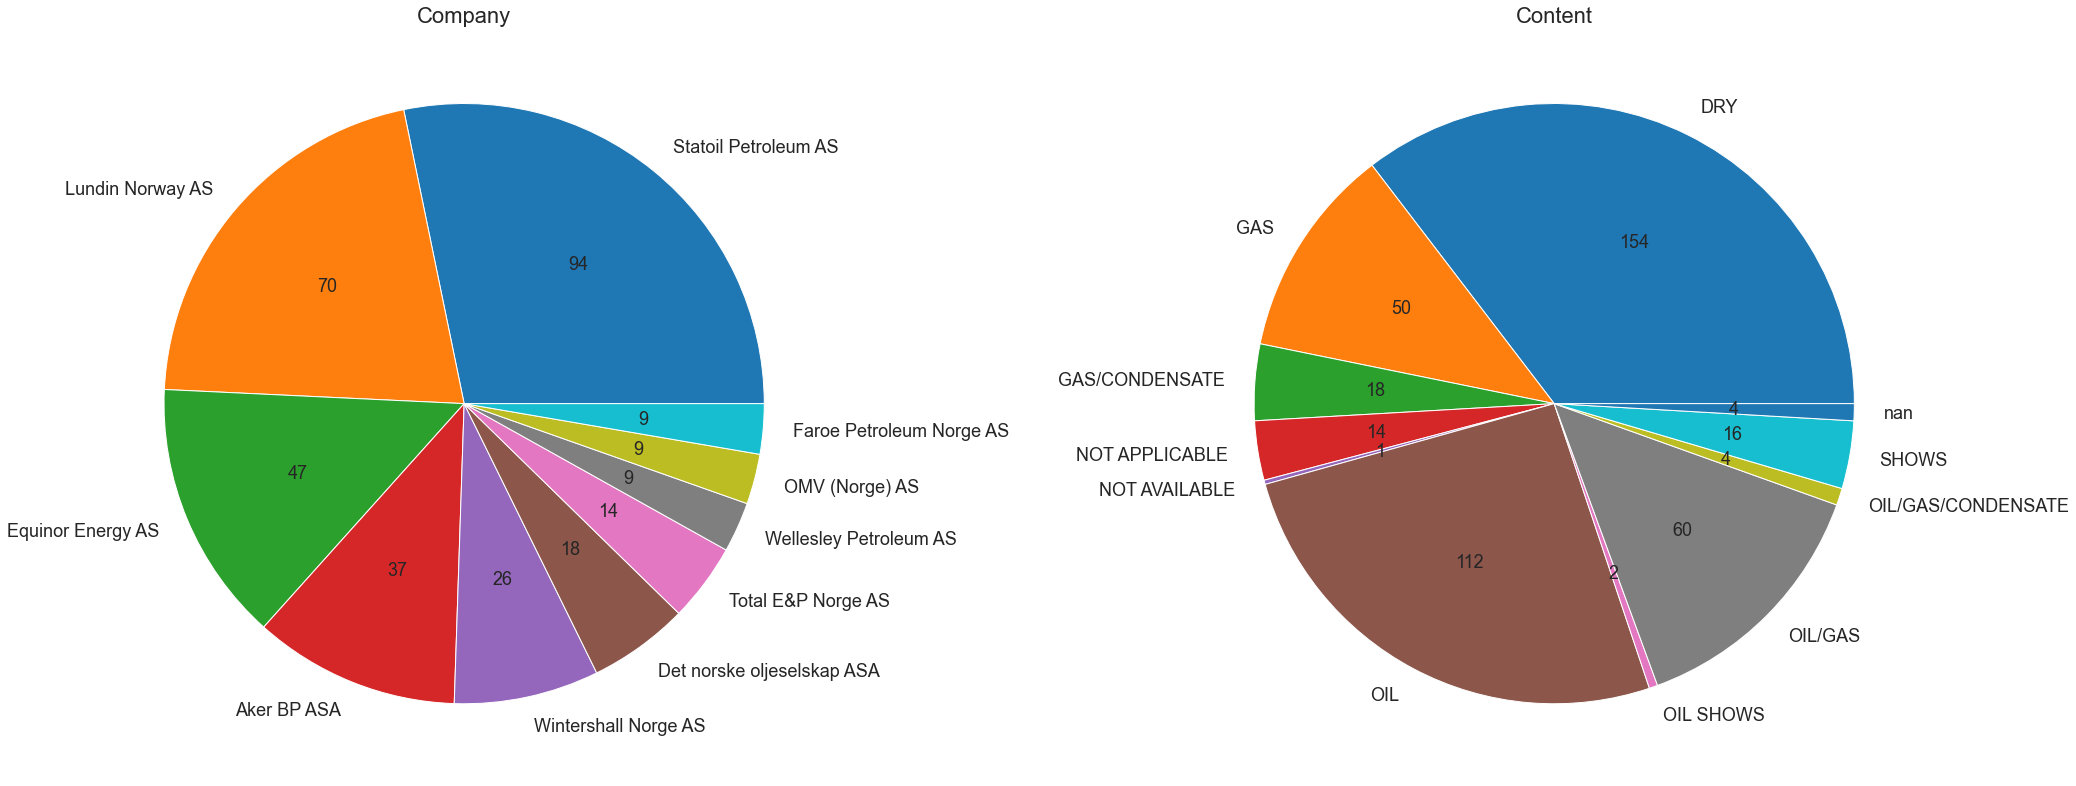

In [13]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18}); ax[0].set_title('Company', fontsize=22)
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18}); ax[1].set_title('Content', fontsize=22)
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_10.png")
plt.show()

### Load All data

In [14]:
link_key = 'well_allLong'
df = load(link_key)

time data '0' does not match format '%Y' (match)
time data '0' does not match format '%Y' (match)


In [15]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

## Drilling Results: All (showing only top 10 company results)
See Wellbore: Table view: Exploration: All - long list

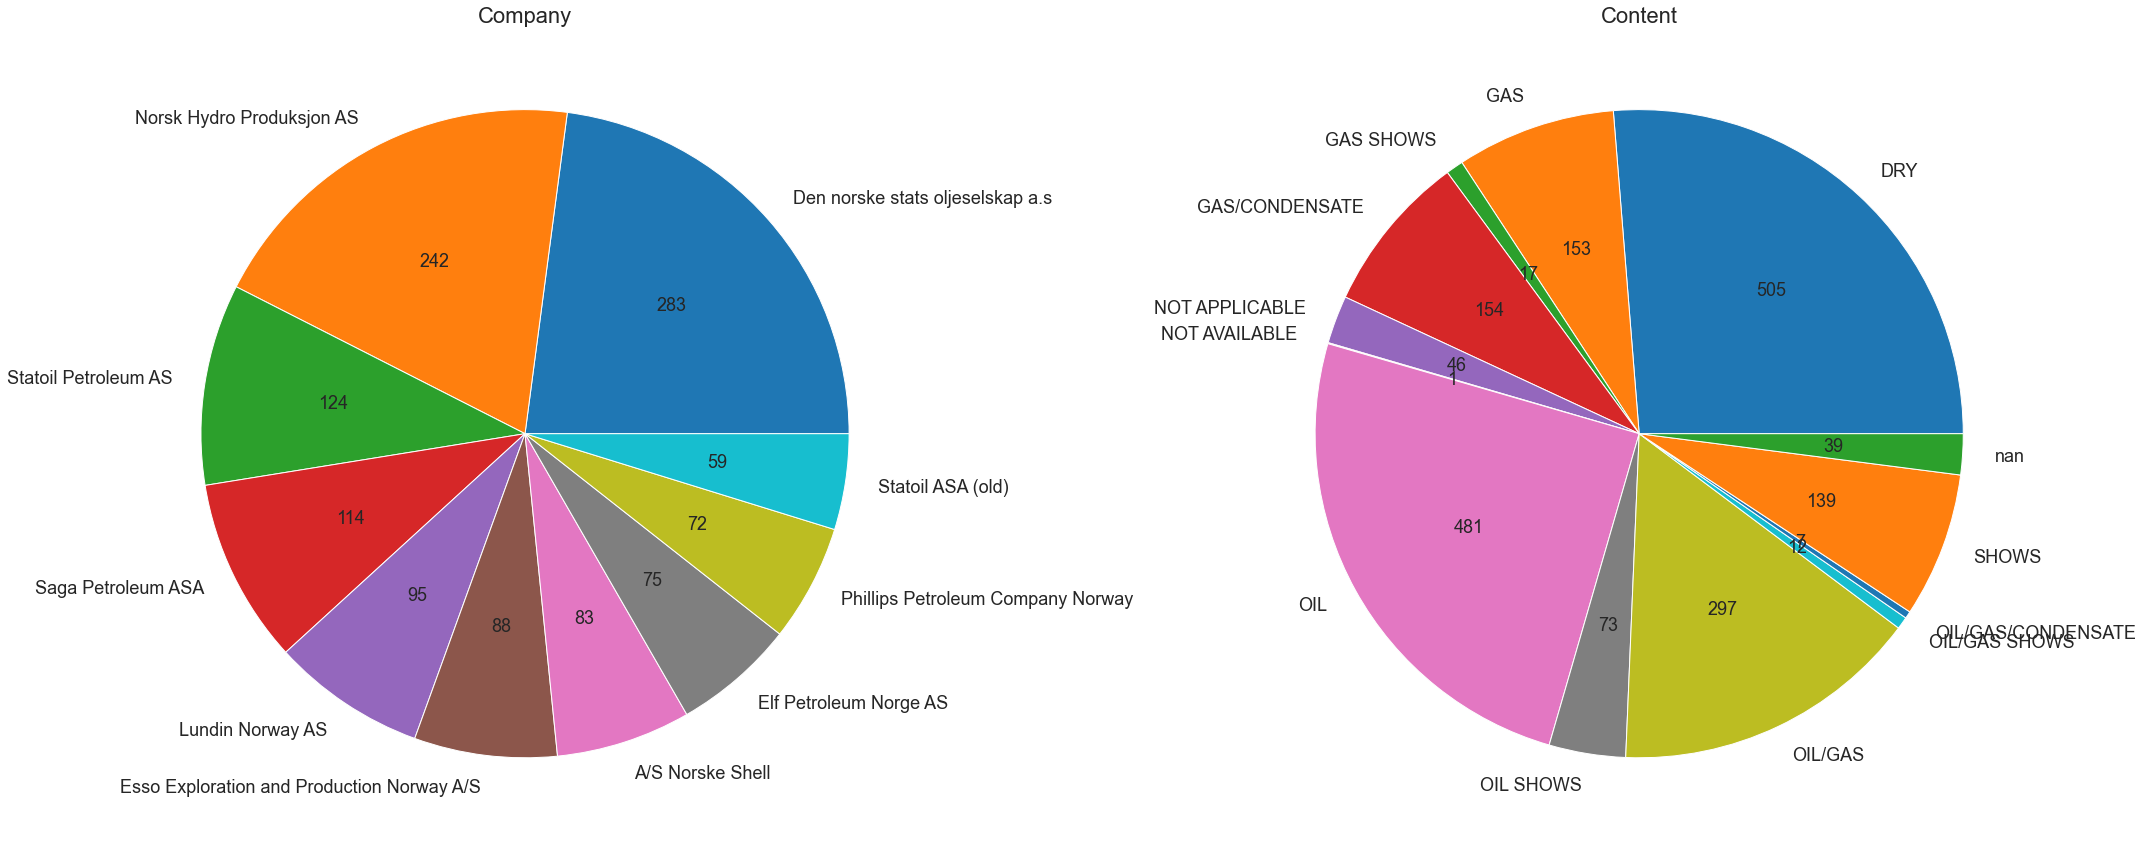

In [16]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18}); ax[0].set_title('Company', fontsize=22)
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18}); ax[1].set_title('Content', fontsize=22)
fig.tight_layout() # pad=5.0
plt.savefig("./figures/drilling_all.png")
plt.show()

In [17]:
df = df.set_index('wlbEntryDate')
df['well_count'] = 1
wellcount_year = df['well_count'].resample('Y').sum()
wellcount_year.index = wellcount_year.index.strftime('%Y')

## Exploration wells drilled on the NCS
From Wellbore: Table view: Exploration: All - long list

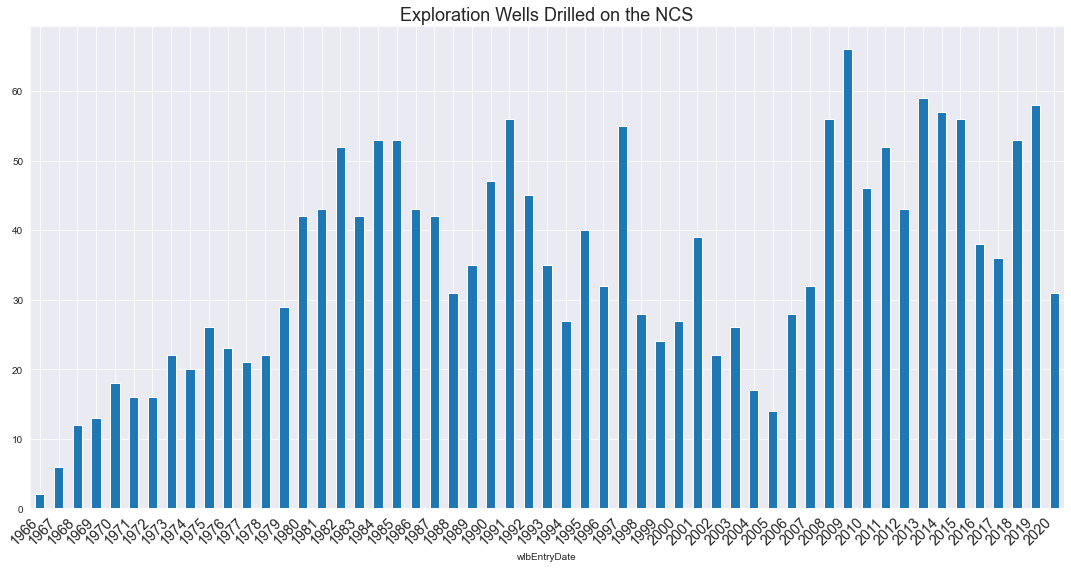

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
wellcount_year.plot(ax=ax, kind='bar')
plt.title('Exploration Wells Drilled on the NCS', fontsize=18)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.tight_layout()
plt.savefig("./figures/expl_yearly_drill.png")
plt.show()

## Formation with HC
### Level 1 and level 2
See Wellbore: Exploration: Table view: All

In [19]:
data0 = df.groupby('wlbFormationWithHc1').size().sort_values(ascending=False).head(20)
data1 = df.groupby('wlbFormationWithHc2').size().sort_values(ascending=False).head(20)

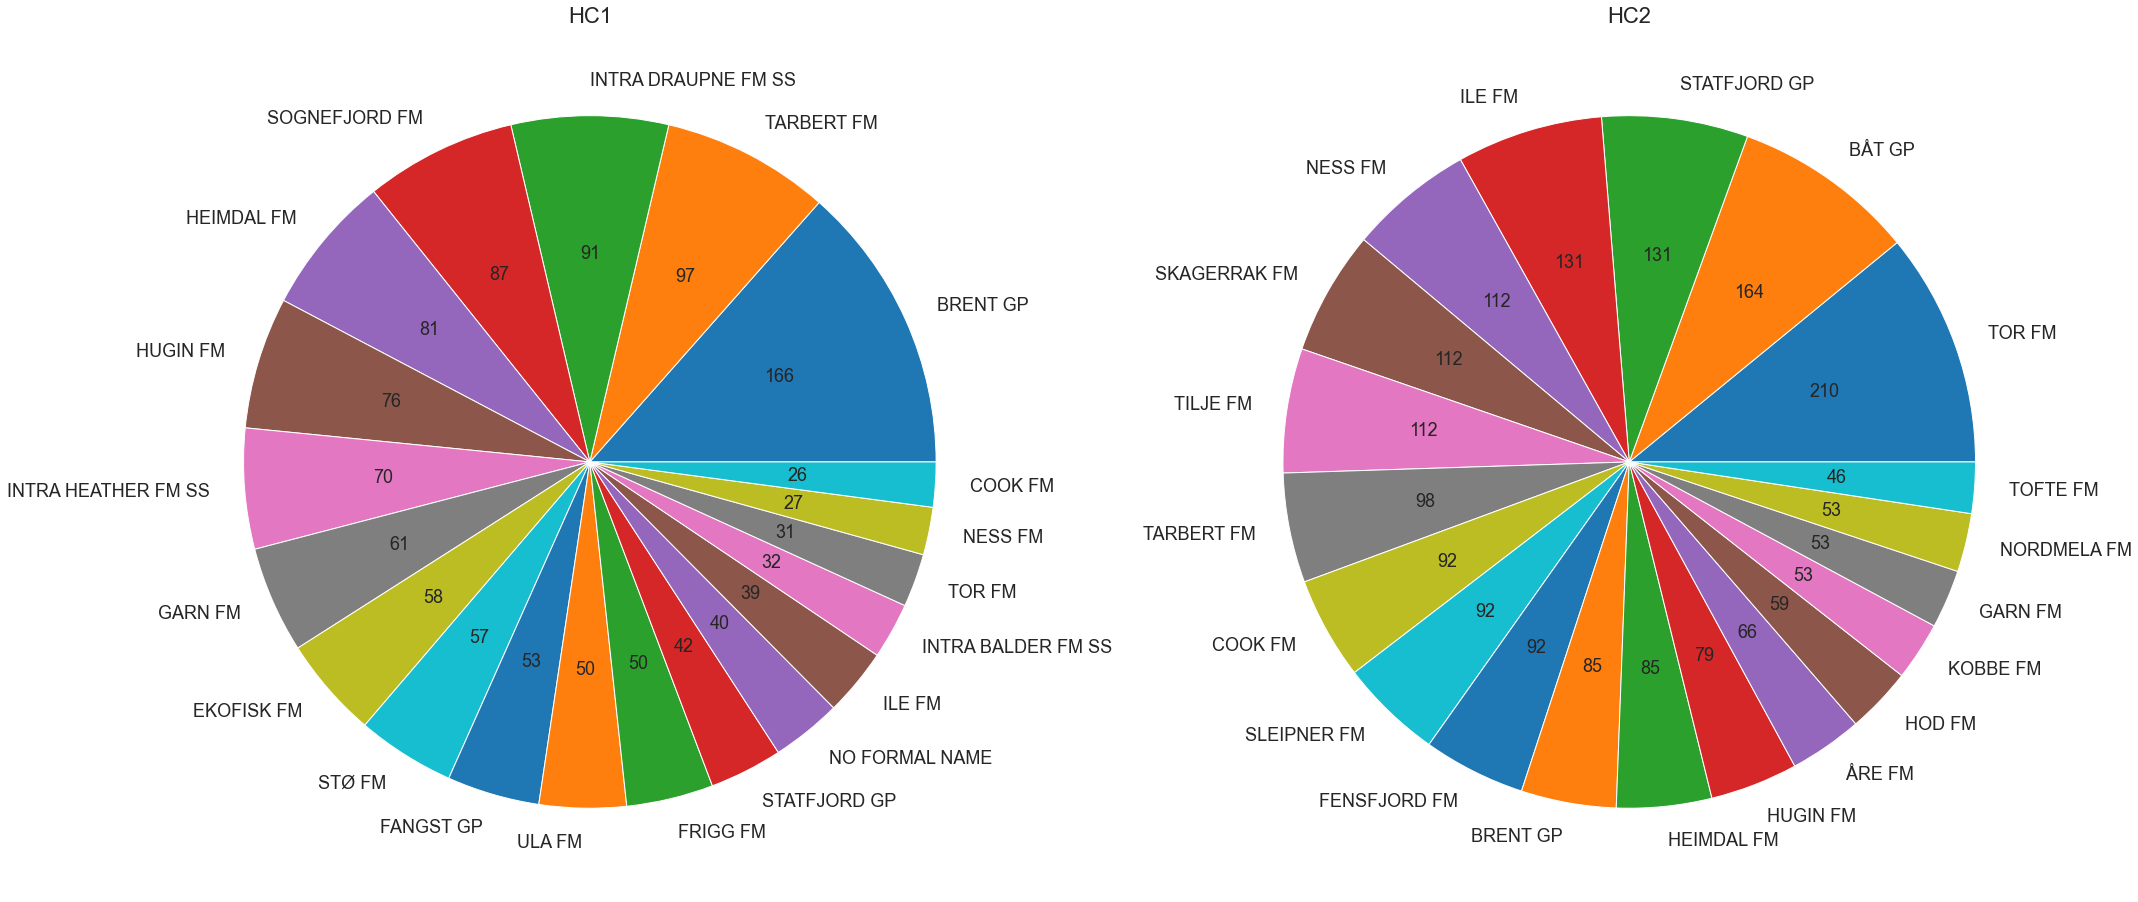

In [20]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18}); ax[0].set_title('HC1', fontsize=22)
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18}); ax[1].set_title('HC2', fontsize=22)
fig.tight_layout() # pad=5.0
plt.savefig("./figures/hydrocarbon_levels.png")
plt.show()

# COMPANY
## Company: Reserves
See Company: Table view: All

In [21]:
link_key = 'comp_reserves'
df = load(link_key)

In [22]:
df.head(6)

,cmpLongName,fldName,cmpRemainingOil,cmpRemainingGas,cmpRemainingNGL,cmpRemainingCondensate,cmpRemainingOE,cmpDateOffResEstDisplay,cmpShare,fldNpdidField,cmpNpdidCompany
0,A/S Norske Shell,GAUPE,0.00,0.00,0.00,0.00,0.00,2019-12-31,60.00000,18161341,562
1,A/S Norske Shell,KNARR,0.77,0.01,0.03,0.00,0.83,2019-12-31,45.00000,20460988,562
2,A/S Norske Shell,KVITEBJØRN,0.27,1.41,0.11,0.00,1.89,2019-12-31,6.45000,1036101,562
3,A/S Norske Shell,ORMEN LANGE,0.00,14.56,0.00,0.68,15.24,2019-12-31,17.81340,2762452,562
4,A/S Norske Shell,TROLL,0.93,61.03,0.98,0.00,63.82,2019-12-31,8.10145,46437,562
5,A/S Norske Shell,VALEMON,0.01,0.13,0.00,0.00,0.15,2019-12-31,3.22500,20460969,562


In [23]:
df = df.groupby('cmpLongName').sum().sort_values(ascending=False, by='cmpRemainingOE')

# company_reserves = df['cmpRemainingOE'].sort_values(ascending=False).index
company_list = df['cmpRemainingOE'].index
print(f"Number of companies reporting Reserves: {len(company_list)}")

Number of companies reporting Reserves: 32


In [24]:
reserves_oe = df['cmpRemainingOE']
reserves = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)

In [25]:
f"Number of companies reporting reserves: {len(company_list)}"

'Number of companies reporting reserves: 32'

# LICENCE
## Registered
Licence: Table view: Overview

In [26]:
link_key = 'lic_regLicensees'
df = load(link_key)

In [27]:
print(f"Number of registered licence companies: {len(df['cmpLongName'].unique())}")

Number of registered licence companies: 41


In [28]:
print(list(enumerate(company_list, start=1)))
selection = int(input("Select company: "))
print("="*32)
print(f"Selected company: {company_list[selection-1]}")

[(1, 'Equinor Energy AS'), (2, 'Petoro AS'), (3, 'Vår Energi AS'), (4, 'Total E&P Norge AS'), (5, 'Aker BP ASA'), (6, 'Lundin Energy Norway AS'), (7, 'Wintershall Dea Norge AS'), (8, 'ConocoPhillips Skandinavia AS'), (9, 'A/S Norske Shell'), (10, 'Neptune Energy Norge AS'), (11, 'OMV (Norge) AS'), (12, 'Spirit Energy Norway AS'), (13, 'Idemitsu Petroleum Norge AS'), (14, 'PGNiG Upstream Norway AS'), (15, 'Repsol Norge AS'), (16, 'INEOS E&P Norge AS'), (17, 'KUFPEC Norway AS'), (18, 'OKEA ASA'), (19, 'DNO Norge AS'), (20, 'LOTOS Exploration and Production Norge AS'), (21, 'Pandion Energy AS'), (22, 'Suncor Energy Norge AS'), (23, 'Mime Petroleum AS'), (24, 'Edison Norge AS'), (25, 'Sval Energi AS'), (26, 'ONE-Dyas Norge AS'), (27, 'Petrolia NOCO AS'), (28, 'Concedo AS'), (29, 'Source Energy AS'), (30, 'Chrysaor Norge AS'), (31, 'CapeOmega AS'), (32, 'Wellesley Petroleum AS')]
Select company: 7
Selected company: Wintershall Dea Norge AS


In [29]:
df[df['cmpLongName']==company_list[selection-1]]

,ptlName,cmpLongName,ptlLicenseeInterest,prlNpdidLicence,cmpNpdidCompany,ptlLicenseeDateUpdated
172,052,Wintershall Dea Norge AS,18.0,21212,35318843,2019-11-18
181,053 B,Wintershall Dea Norge AS,35.2,48207,35318843,2019-11-18
193,055,Wintershall Dea Norge AS,35.2,21236,35318843,2019-11-18
202,055 B,Wintershall Dea Norge AS,35.2,102499,35318843,2019-11-18
211,055 D,Wintershall Dea Norge AS,35.2,22813096,35318843,2019-11-18
...,...,...,...,...,...,...
1454,929,Wintershall Dea Norge AS,20.0,30675094,35318843,2019-11-18
1489,944,Wintershall Dea Norge AS,40.0,30676329,35318843,2019-11-21
1517,960,Wintershall Dea Norge AS,20.0,32017693,35318843,2019-11-18
1527,964,Wintershall Dea Norge AS,35.0,32017859,35318843,2019-11-21


In [30]:
compare_list = []
if selection == 1:
    compare_list.extend([company_list[selection], company_list[selection-1], company_list[selection+1]])
elif selection == len(reserves):
    compare_list.extend([company_list[selection-2], company_list[selection-1], company_list[selection-3]])
else:
    compare_list.extend([company_list[selection], company_list[selection-1], company_list[selection-2]])

In [31]:
partners_compare = {}

for company in compare_list:
    # filter for each company and sort by held interest in licence
    df_company = df[df['cmpLongName']==company].sort_values(by='ptlLicenseeInterest', ascending=False)
    
    # Number of licences held
    num_licences = len(df_company)
        
    # create a list of all licences for each company
    licences = list(df_company['ptlName'])
    licensees = pd.DataFrame()
    for licence in licences:
        # for each licence held by each company create df of all companies in the licence
        licensees = licensees.append(df[df['ptlName']==licence])
    
    # now create df of only partner companies   
    partners = licensees[licensees['cmpLongName']!=company]
    partners = partners.groupby('cmpLongName').count().sort_values(by='ptlName', ascending=False)
    partners = partners['ptlName']
    partners = partners.sort_values(ascending=False)
    for partner in partners:
        partners_compare[company] = partners

# Comparison by OE
Comparison takes a selected company and plots that company with the company above and below in terms of sorted OE values

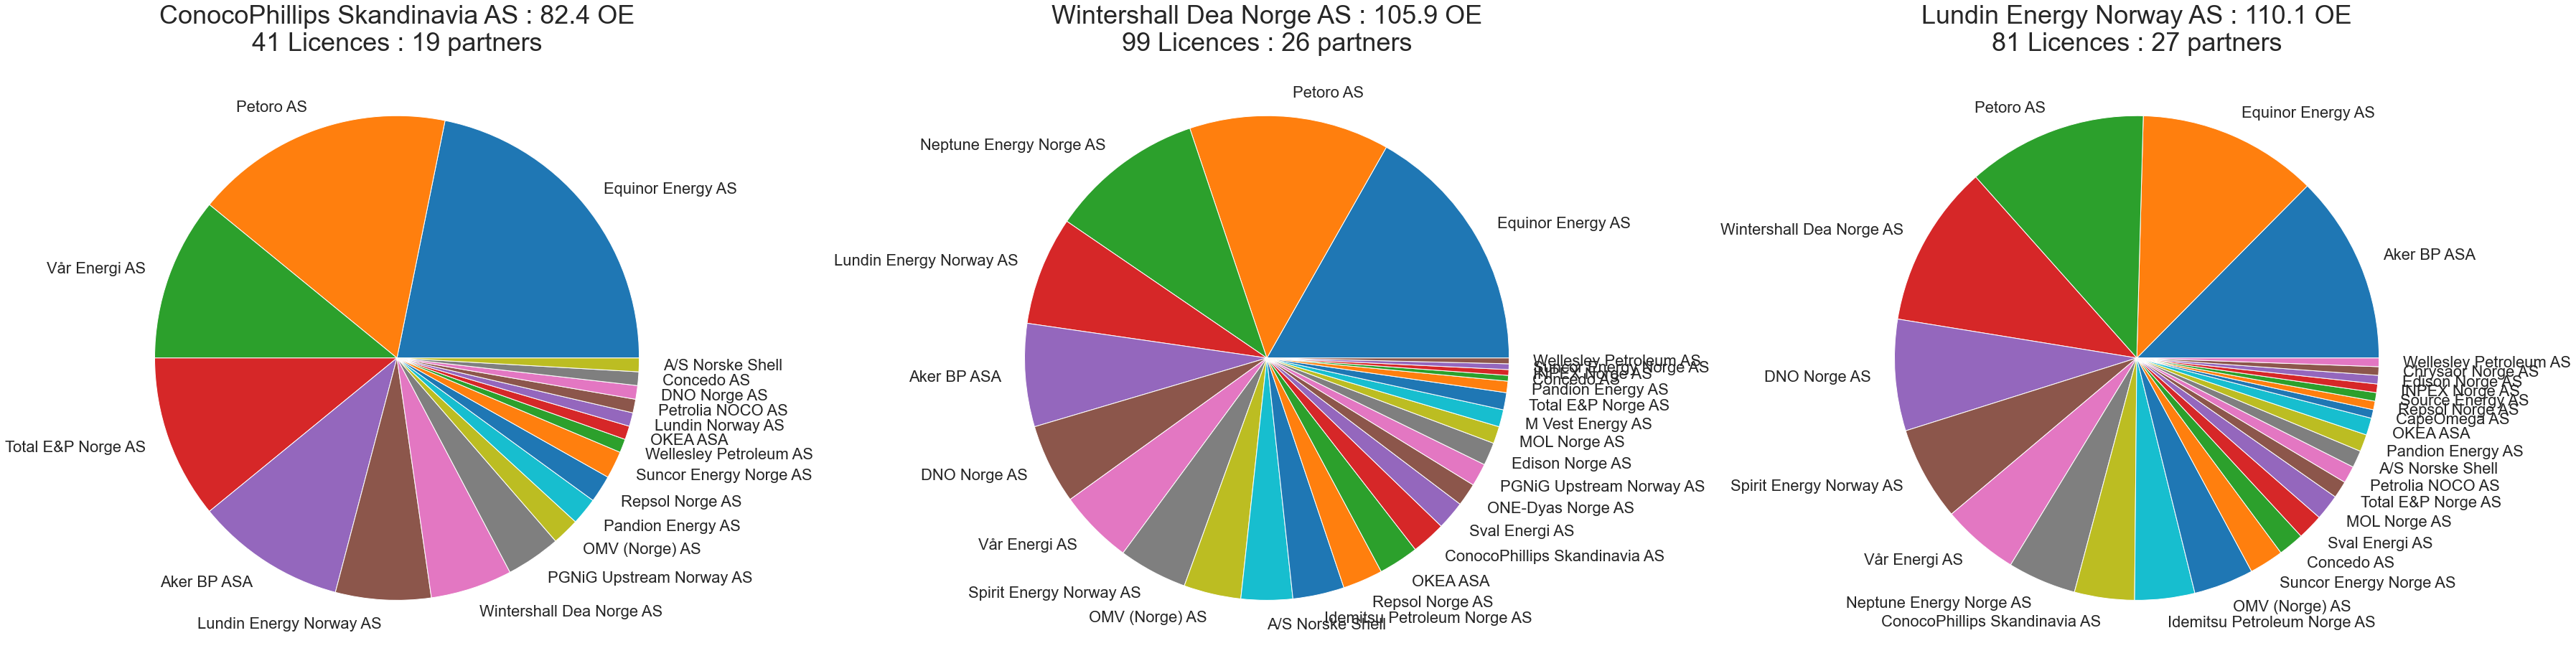

In [32]:
fig, ax = plt.subplots(1, len(list(partners_compare.keys())), figsize=(50,20))
for i in range(len(list(partners_compare.keys()))):    
    data = list(partners_compare.values())[i]
    ax[i].pie(data, labels=partners_compare[compare_list[i]].index, textprops={'fontsize': 22})    
    ax[i].set_title(f"{compare_list[i]} : {reserves_oe[list(partners_compare.keys())[i]]:.1f} OE\n{df[df['cmpLongName']==compare_list[i]].shape[0]} Licences : {len(list(partners_compare.values())[i])} partners", fontsize=36)

plt.tight_layout()
plt.savefig("./figures/company_partner_comparison_by_reserves.png")
plt.show()

# set every company a colour
# plot OE break down, licence region break down, common licences

In [33]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbFormationWithHc1').size().sort_values(ascending=False).head(20)).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbFormationWithHc2').size().sort_values(ascending=False).head(20)).sum(), 0))
    return a

# DISCOVERY
## Table view: Overview
See Discovery: Table view: Overview

### Load Discovery data

In [34]:
link_key = 'disc_overview'
df = load(link_key)

## Discoveries grouped by Company

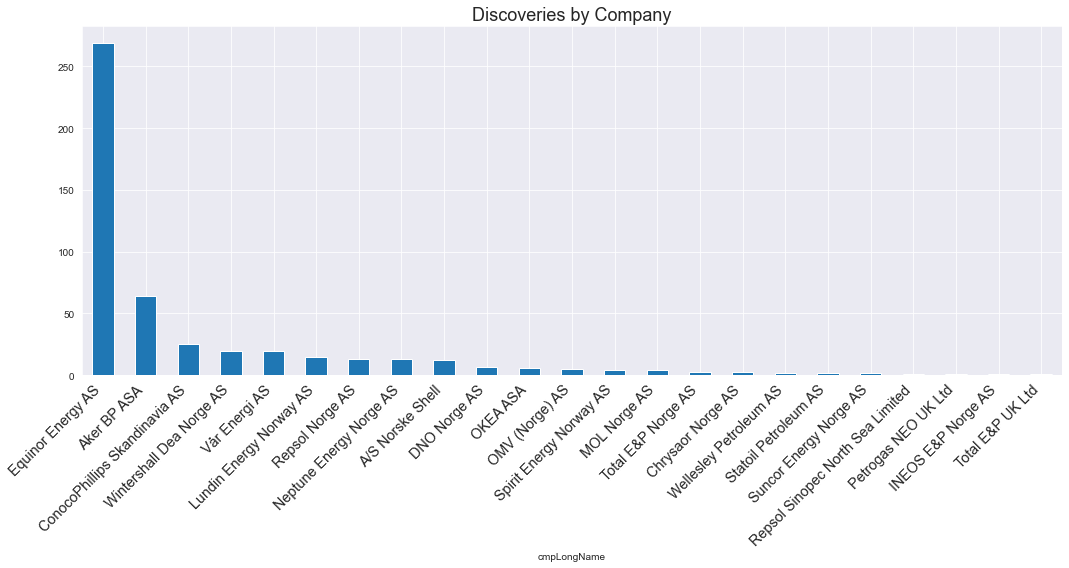

In [35]:
data = df.groupby('cmpLongName').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(15,8), title='Company Discoveries')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discoveries by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_ov.png")
plt.show()

In [36]:
def absolute_value(val):
    a  = int(np.round(val/100.*(df.groupby('dscHcType').size()).sum(), 0))
    return a

## Discovery HC content

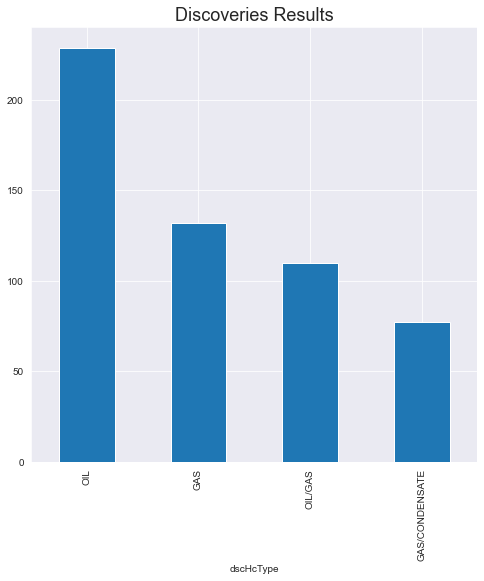

In [37]:
data = df.groupby('dscHcType').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(8,8), title='Discovery HC content') # , autopct=absolute_value
plt.title('Discoveries Results', fontsize=18)
plt.savefig("./figures/discovery_results.png")
plt.show()

In [38]:
disc_areas = df.groupby(['dscHcType', 'nmaName']).size().unstack()
disc_areas = disc_areas.reindex(["OIL",  "OIL/GAS", "GAS","GAS/CONDENSATE"])
disc_areas = disc_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]

## Discovery HC type by Region (North Sea, Norwegian Sea, Barents Sea)

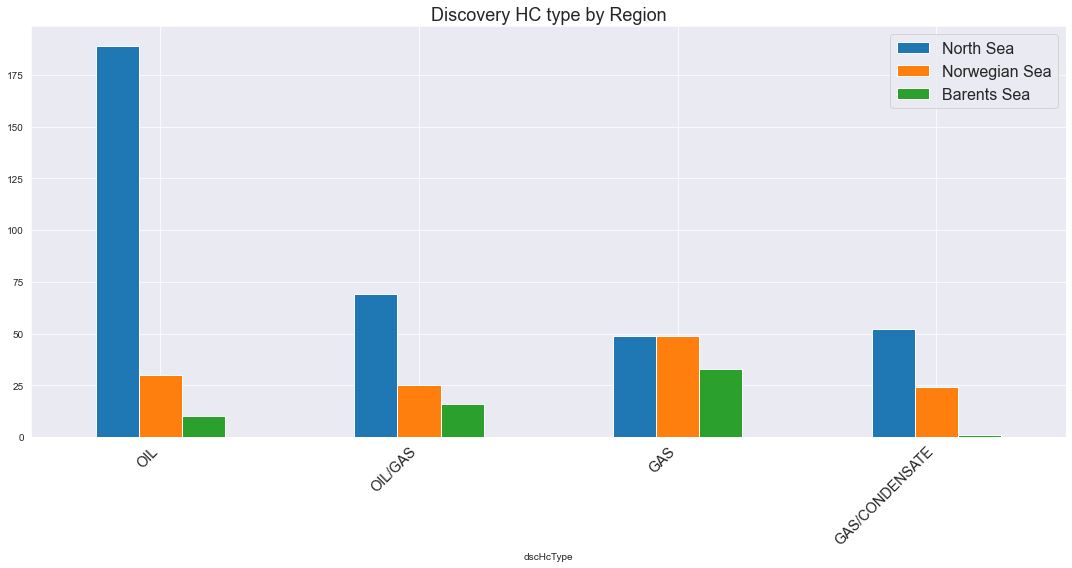

In [39]:
disc_areas.plot(kind='bar', figsize=(15,8), title='Discovery type by region')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discovery HC type by Region', fontsize=18); plt.legend(loc=1, prop={'size': 16}); plt.tight_layout()
plt.savefig("./figures/discovery_results_type.png"); plt.show()

In [40]:
reg_disc = df.groupby([ 'nmaName', 'dscHcType']).size().unstack()
reg_disc = reg_disc.reindex(['North Sea', 'Norwegian Sea', 'Barents Sea'])
reg_disc = reg_disc[["OIL",  "OIL/GAS", "GAS","GAS/CONDENSATE"]]

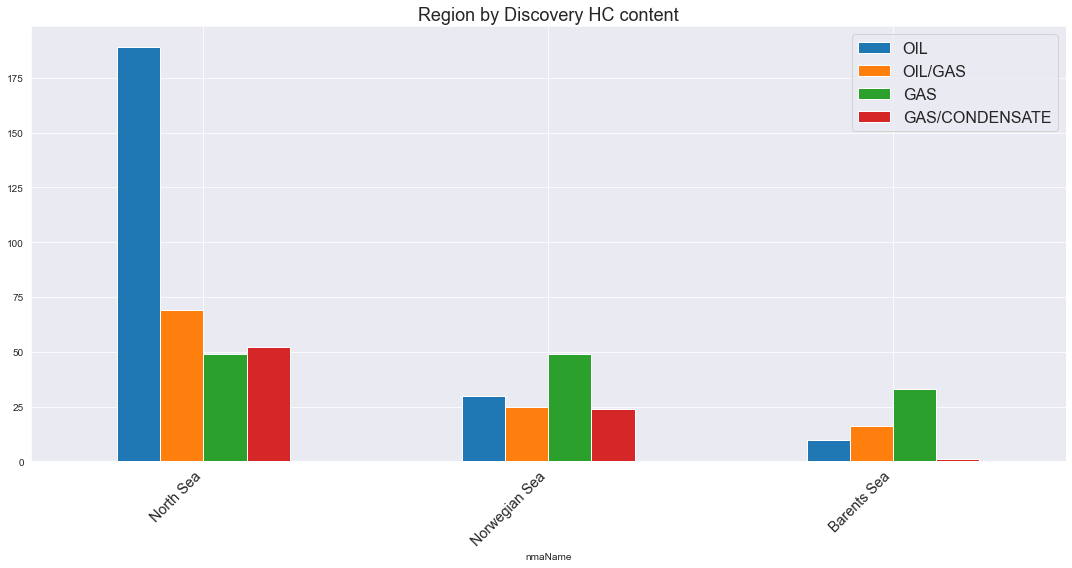

In [41]:
reg_disc.plot(kind='bar', figsize=(15,8), title='region by HC content')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Region by Discovery HC content', fontsize=18); plt.legend(loc=1, prop={'size': 16}); plt.tight_layout()
plt.savefig("./figures/region_discovery_results_type.png"); plt.show()

# DISCOVERY
## Resources
See Discovery: Table view: Resources

### Load Resources

In [42]:
link_key = 'disc_resources'
df = load(link_key)

## Discovery Resources

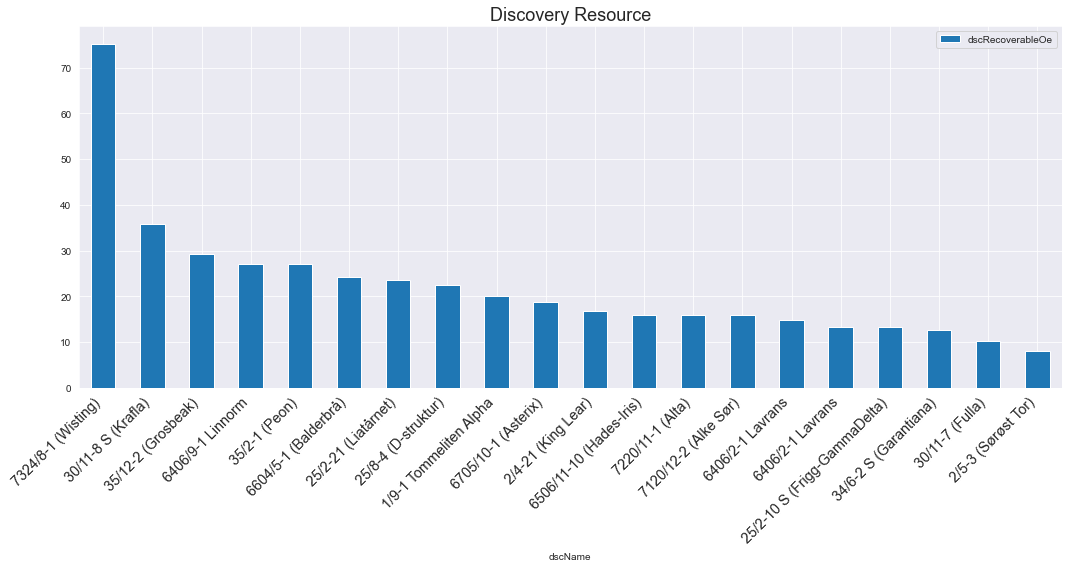

In [43]:
data = df.sort_values(by='dscRecoverableOe',ascending=False).head(20)
data.plot(kind='bar', x='dscName', y='dscRecoverableOe', figsize=(15,8), title='Discovery Resouce')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discovery Resource', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_resources.png")
plt.show()

## Operators
See Licence: Table view: Operators

In [44]:
link_key = 'lic_operators'
df = load(link_key)

In [45]:
# Filter for most recent 'prlName' (Company) that held licence
df = df.loc[df.groupby('prlName').prlOperDateValidFrom.idxmax(),:]
# Filter for current valid (NaT)
df = df[df.prlOperDateValidTo.isnull()]

In [46]:
df[df['cmpLongName'] == company_list[selection-1]]

,prlName,prlOperDateValidFrom,prlOperDateValidTo,cmpLongName,prlNpdidLicence,cmpNpdidCompany,prlOperDateUpdated
434,053 B,2019-11-13,NaT,Wintershall Dea Norge AS,48207,35318843,2019-11-19
449,055,2019-11-13,NaT,Wintershall Dea Norge AS,21236,35318843,2019-11-19
455,055 B,2019-11-13,NaT,Wintershall Dea Norge AS,102499,35318843,2019-11-19
466,055 D,2019-11-13,NaT,Wintershall Dea Norge AS,22813096,35318843,2019-11-19
469,055 E,2020-02-14,NaT,Wintershall Dea Norge AS,36463530,35318843,2020-02-22
631,090 C,2019-11-13,NaT,Wintershall Dea Norge AS,3426824,35318843,2019-11-18
740,1010,2019-11-13,NaT,Wintershall Dea Norge AS,34040458,35318843,2019-11-18
767,1020,2019-11-13,NaT,Wintershall Dea Norge AS,34040985,35318843,2019-11-19
769,1021,2019-11-13,NaT,Wintershall Dea Norge AS,34041032,35318843,2019-11-18
828,1054,2020-02-14,NaT,Wintershall Dea Norge AS,36464996,35318843,2020-02-22


# STRATIGRAPHY
## Overview
Stratigraphy: Table view: Overview

In [47]:
link_key = 'strat_wellbores'
df = load(link_key)
df = df.loc[df.groupby('wlbName').lsuTopDepth.idxmax(),:]
data = df.groupby('lsuName').count()['wlbName'].sort_values(ascending=False).head(10)

## Stratigraphy at TD

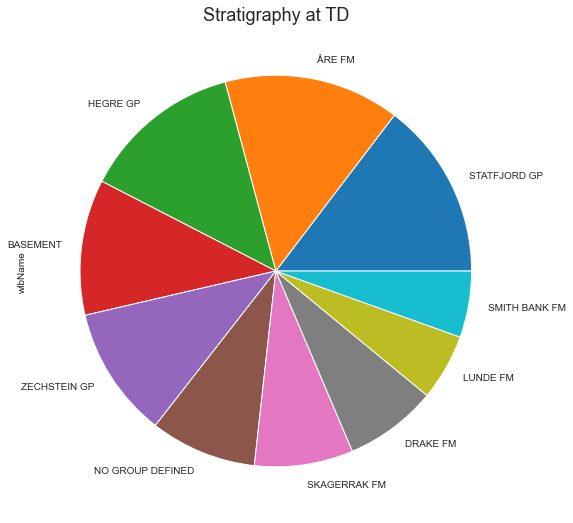

In [48]:
data.plot(kind='pie', figsize=(8,8))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Stratigraphy at TD', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/stratigraphy_by_TD.png")
plt.show()

## Cores
See Stratigraphy: Table view: Cores

In [49]:
link_key = 'strat_cores'
df = load(link_key)

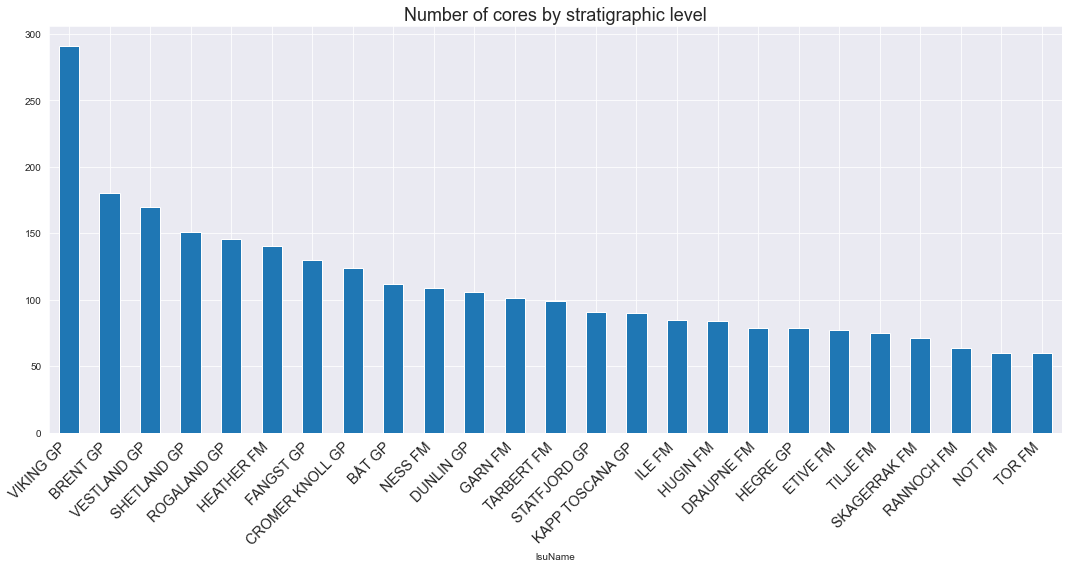

In [50]:
# Plot number of cores in each Formation / Group
data = df.groupby('lsuName').size().sort_values(ascending=False).head(25)
data.plot(kind='bar', figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of cores by stratigraphic level', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/core_by_formation.png")
plt.show()

## Work Obligations
See Licence: Table view: Work obligations/conditions

In [51]:
link_key = 'lic_workObligs'
df = load(link_key)

In [52]:
df = df[df['prlTaskStatusEn']=='Approved']
df = df.loc[df.groupby('prlName').prlTaskExpiryDate.idxmax(),:]

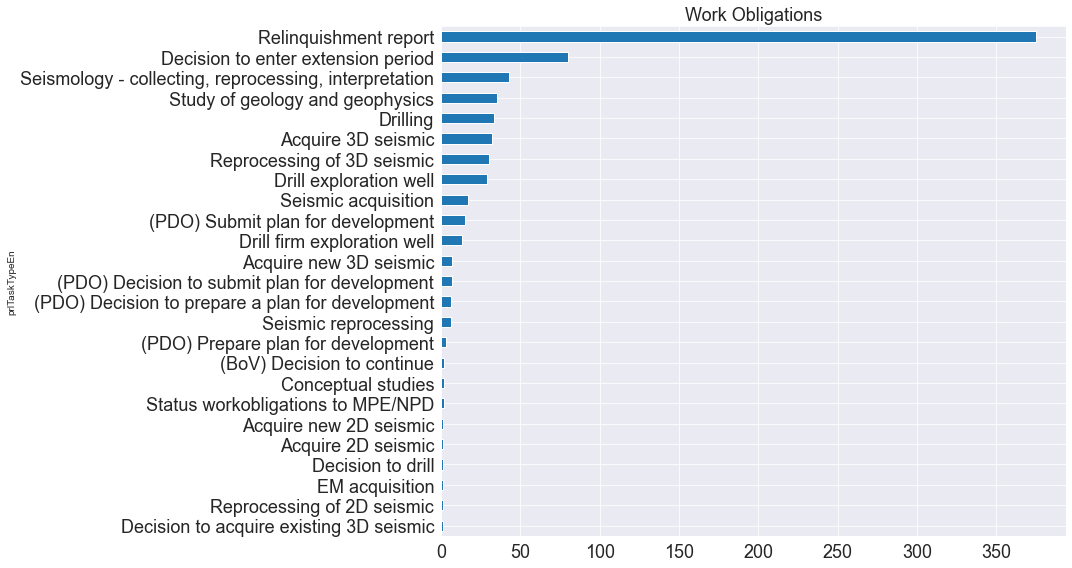

In [53]:
data = df.groupby('prlTaskTypeEn').size().sort_values()
data.plot(kind='barh', figsize=(15,8), fontsize=18)
plt.title('Work Obligations', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/work_obligations.png")
plt.show()

# The End

# FIELD
## Table: Overview
See Field: Table view: Overview

In [54]:
link_key = 'field_overview'
df = load(link_key)

In [55]:
df.head()

,fldName,cmpLongName,fldCurrentActivitySatus,wlbName,wlbCompletionDate,fldMainArea,fldOwnerKind,fldOwnerName,fldMainSupplyBase,fldNpdidOwner,fldNpdidField,wlbNpdidWellbore,cmpNpdidCompany,fldFactPageUrl,fldFactMapUrl,fldDateUpdated,fldDateUpdatedMax
0,ALBUSKJELL,ConocoPhillips Skandinavia AS,Shut down,1/6-1,1972-11-26,North Sea,PRODUCTION LICENSE,018,NaN,20900.0,43437,239,2410696.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-03,2020-02-26
1,ALVE,Equinor Energy AS,Producing,6507/3-1,1990-10-26,Norwegian Sea,PRODUCTION LICENSE,159 B,Sandnessjøen,2819945.0,4444332,1533,32011216.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-03,2020-02-25
2,ALVHEIM,Aker BP ASA,Producing,24/6-2,1998-07-08,North Sea,PRODUCTION LICENSE,203,NaN,22436.0,2845712,3397,28544099.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-09,2020-04-15
3,ATLA,Total E&P Norge AS,Producing,25/5-7,2010-10-23,North Sea,PRODUCTION LICENSE,102 C,NaN,5467035.0,21106284,6423,2410708.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2020-02-08,2020-02-25
4,BALDER,Vår Energi AS,Producing,25/11-1,1967-07-09,North Sea,PRODUCTION LICENSE,001,Dusavik,20756.0,43562,143,33360957.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-03,2020-02-26


## Number of fields per region (North Sea, Norwegian Sea, Barents Sea)

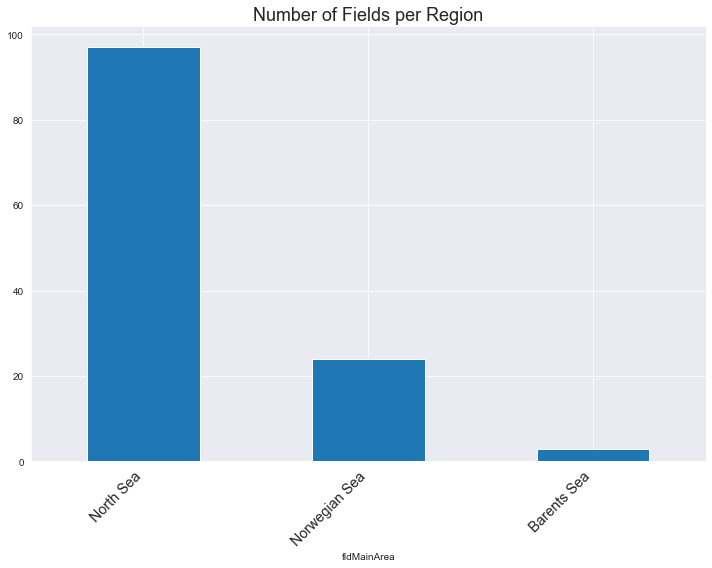

In [56]:
data = df.groupby('fldMainArea').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(10,8), title='Fields per region')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of Fields per Region', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_region.png")
plt.show()

## Fields owned by Company

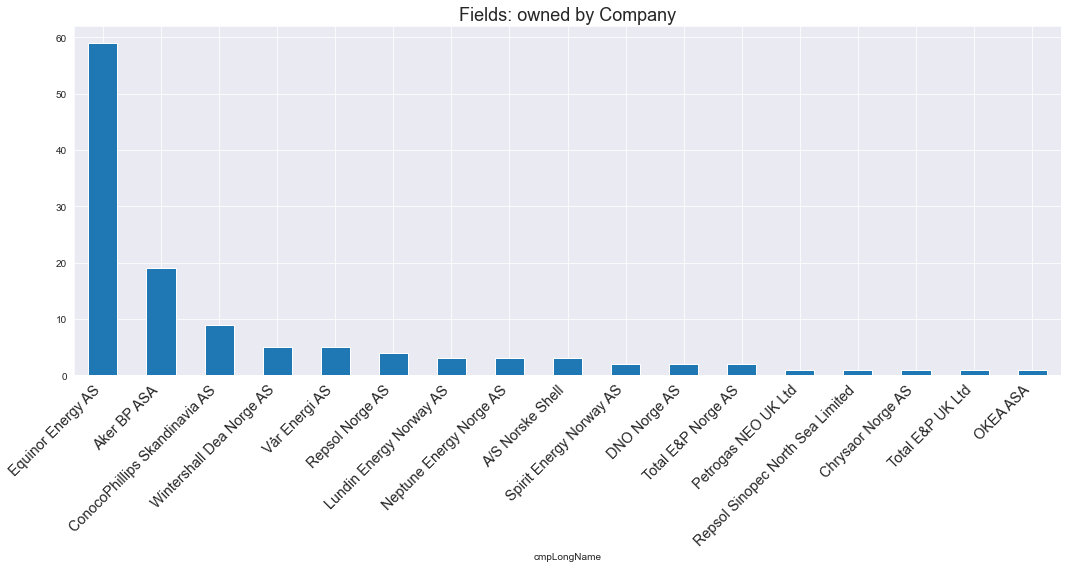

In [57]:
data = df.groupby('cmpLongName').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(15,8), title='Fields owned by Company')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Fields: owned by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_company.png")
plt.show()

In [58]:
field_areas = df.groupby(['cmpLongName', 'fldMainArea']).size().unstack()
field_areas = field_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]
data = field_areas.sort_values(by='North Sea', ascending=False)

## Fields owned by Company by region (North Sea, Norwegian Sea, Barents Sea)

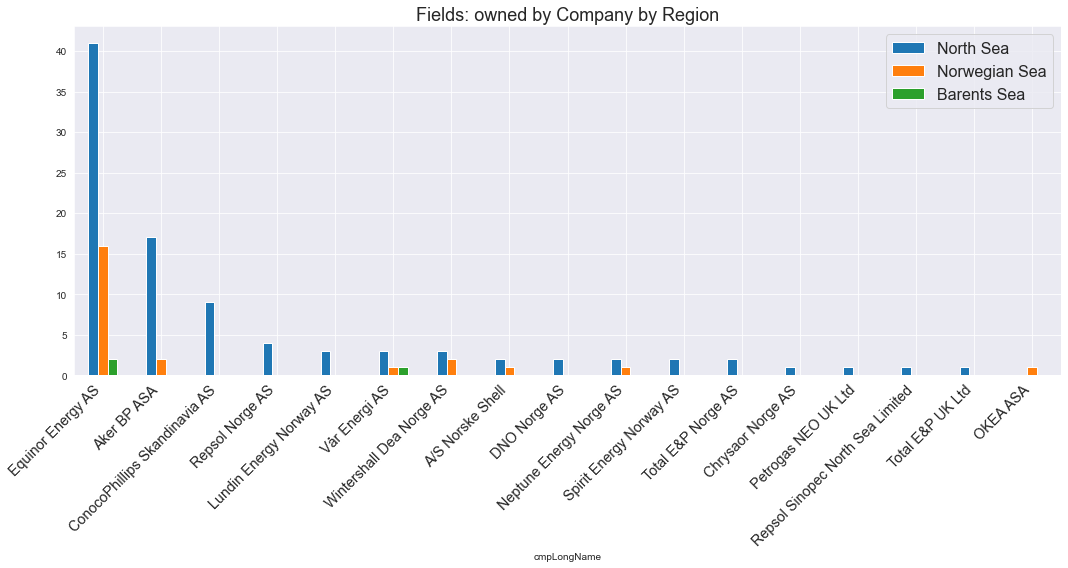

In [59]:
data.plot(kind='bar', figsize=(15,8), title='Fields owned by Company by region',)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Fields: owned by Company by Region', fontsize=18)
plt.legend(loc=1, prop={'size': 16})
plt.tight_layout()
plt.savefig("./figures/fields_by_company_by_region.png")
plt.show()

## Number of field discoveries by decade

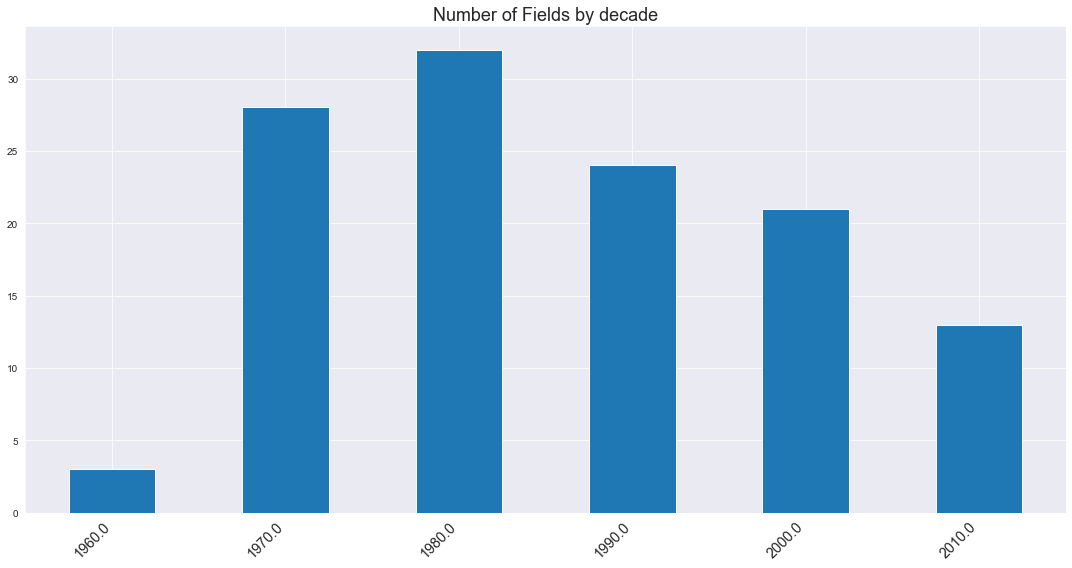

In [60]:
data = df.set_index('wlbCompletionDate').groupby(lambda x: (x.year//10)*10).count()['fldName']
data.plot(kind='bar', figsize=(15,8), title='Fields per decade',)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of Fields by decade', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_decade.png")
plt.show()

# links to npd.no csv exports
company_reserves = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/company_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_regLicensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_petreg_licence_licencee&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_operators = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_oper_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_workobligations = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_task&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
baa_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/bsns_arr_area_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_inplacevolumes = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_in_place_volumes&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_wellbores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_cores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore_core&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_explorationcurrent = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_current_year&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_exploration10years = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_last_10_years&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_alllong = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_resources = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
